# Flights Price Prediction Project:-

In [1]:
# For importing neccessary libraries:-
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [13]:
# Loading the csv file:-
df=pd.read_excel(r"E:\Flip Robo\Project\Flight Price Prediction\Flight_Data.xlsx")

In [14]:
# .head used for fetching first five rows of the dataset:- 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


# Exploratory Data Analysis (EDA):-

In [16]:
# For checking how many rows and columns are there in dataset.
df.shape

(10683, 10)

So, As seen above there are 10683 rows and 10 columns present in this dataset.

In [17]:
# For checking the available columns in the dataset.
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [18]:
# For checking the Null values in the dataset:-
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

As seen, there are no null values present in dataset.

In [19]:
# For checking the datatypes of each columns:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Price               int64
dtype: object

In [20]:
# For checking the information of the dataset:-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


In [21]:
# For checking the unique values in the dataset:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Price              1870
dtype: int64

Here, our target column has maximum unique values present.

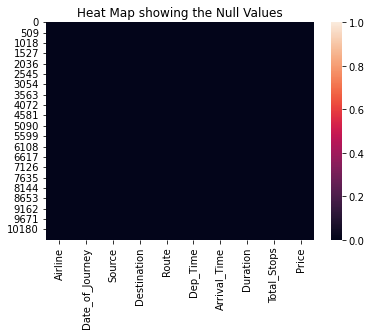

In [28]:
# For visualizing presence of null values using heatmap:-
sns.heatmap(df.isnull())
plt.title("Heat Map showing the Null Values")
plt.show()

In [29]:
# For checking the value counts in all the columns of the dataset:-
for i in df.columns:
    print(df[i].value_counts())
    print('----------------')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
----------------
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
1

- As seen, in Airlines columns we can see that Jet Airways is having most no. of flights followed by IndiGo and Air India.

- In, From and To column it is seen that maximum number of flights are operating from Delhi followed by Kolkata and Bengaluru.

- In Stops Column,it is observed that almost 32.67 % of flights operate Nonstop, 52.65 % one stop and very few flights operate with more than one stop.

In [37]:
# For checking unique values in Stops column:-
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [38]:
# For checking the presence of unique values present in each column:-
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Price              1870
dtype: int64

In [40]:
# For changing datatype of column Travel_date from object to datetime:-
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [42]:
# For separating Date, Month and Year to simplify data for analysis further:-
df['Date']=pd.to_datetime(df.Date_of_Journey,format='%d%m%y').dt.day
df['Month']=pd.to_datetime(df.Date_of_Journey,format='%d%m%y').dt.month
df['Year']=pd.to_datetime(df.Date_of_Journey,format='%d%m%y').dt.year

In [44]:
# For dropping the column Travel_date to avoid duplication in dataset:-
df.drop(['Date_of_Journey'],axis=1, inplace=True)

In [45]:
# For checking the data after removing ans splitting column:-
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,3,1,2019


In [46]:
# For displaying unique values again after splitting data:-
df.nunique()

Airline           12
Source             5
Destination        6
Route            128
Dep_Time         222
Arrival_Time    1343
Duration         368
Total_Stops        5
Price           1870
Date               9
Month              7
Year               1
dtype: int64

Here, Year column has only 1 unique value, so it should be dropped as it is not required further for analysis.

In [47]:
df.drop(['Year'],axis=1,inplace=True)

In [48]:
# For converting the datatype of Departuretime and Arrivaltime for object dtype to datetime dtype:-
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

In [49]:
# For seperating hour and minutes from Departuretime:-
df["Departhour"]=pd.to_datetime(df['Dep_Time']).dt.hour
df["DepartMin"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [50]:
# For dropping Departuretime to avoid duplicacy of data:-
df=df.drop(['Dep_Time'],axis=1)

In [51]:
# For separting Hour and Minutes from Arrivaltime:-
df["Arrivalhour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrivalmin"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

In [52]:
# For dropping Arrivaltime for avoiding duplicacy of data:-
df=df.drop(["Arrival_Time"],axis=1)

# Performing Univariate Analysis:-

In [53]:
# For splitting the columns from datatype object and integer:-
categorical=[]
integer=[]
for i in df.columns:
    if df[i].dtypes=='object':
        categorical.append(i)
    else:
        integer.append(i)
print(categorical)
print("----")
print(integer)

['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops']
----
['Price', 'Date', 'Month', 'Departhour', 'DepartMin', 'Arrivalhour', 'Arrivalmin']


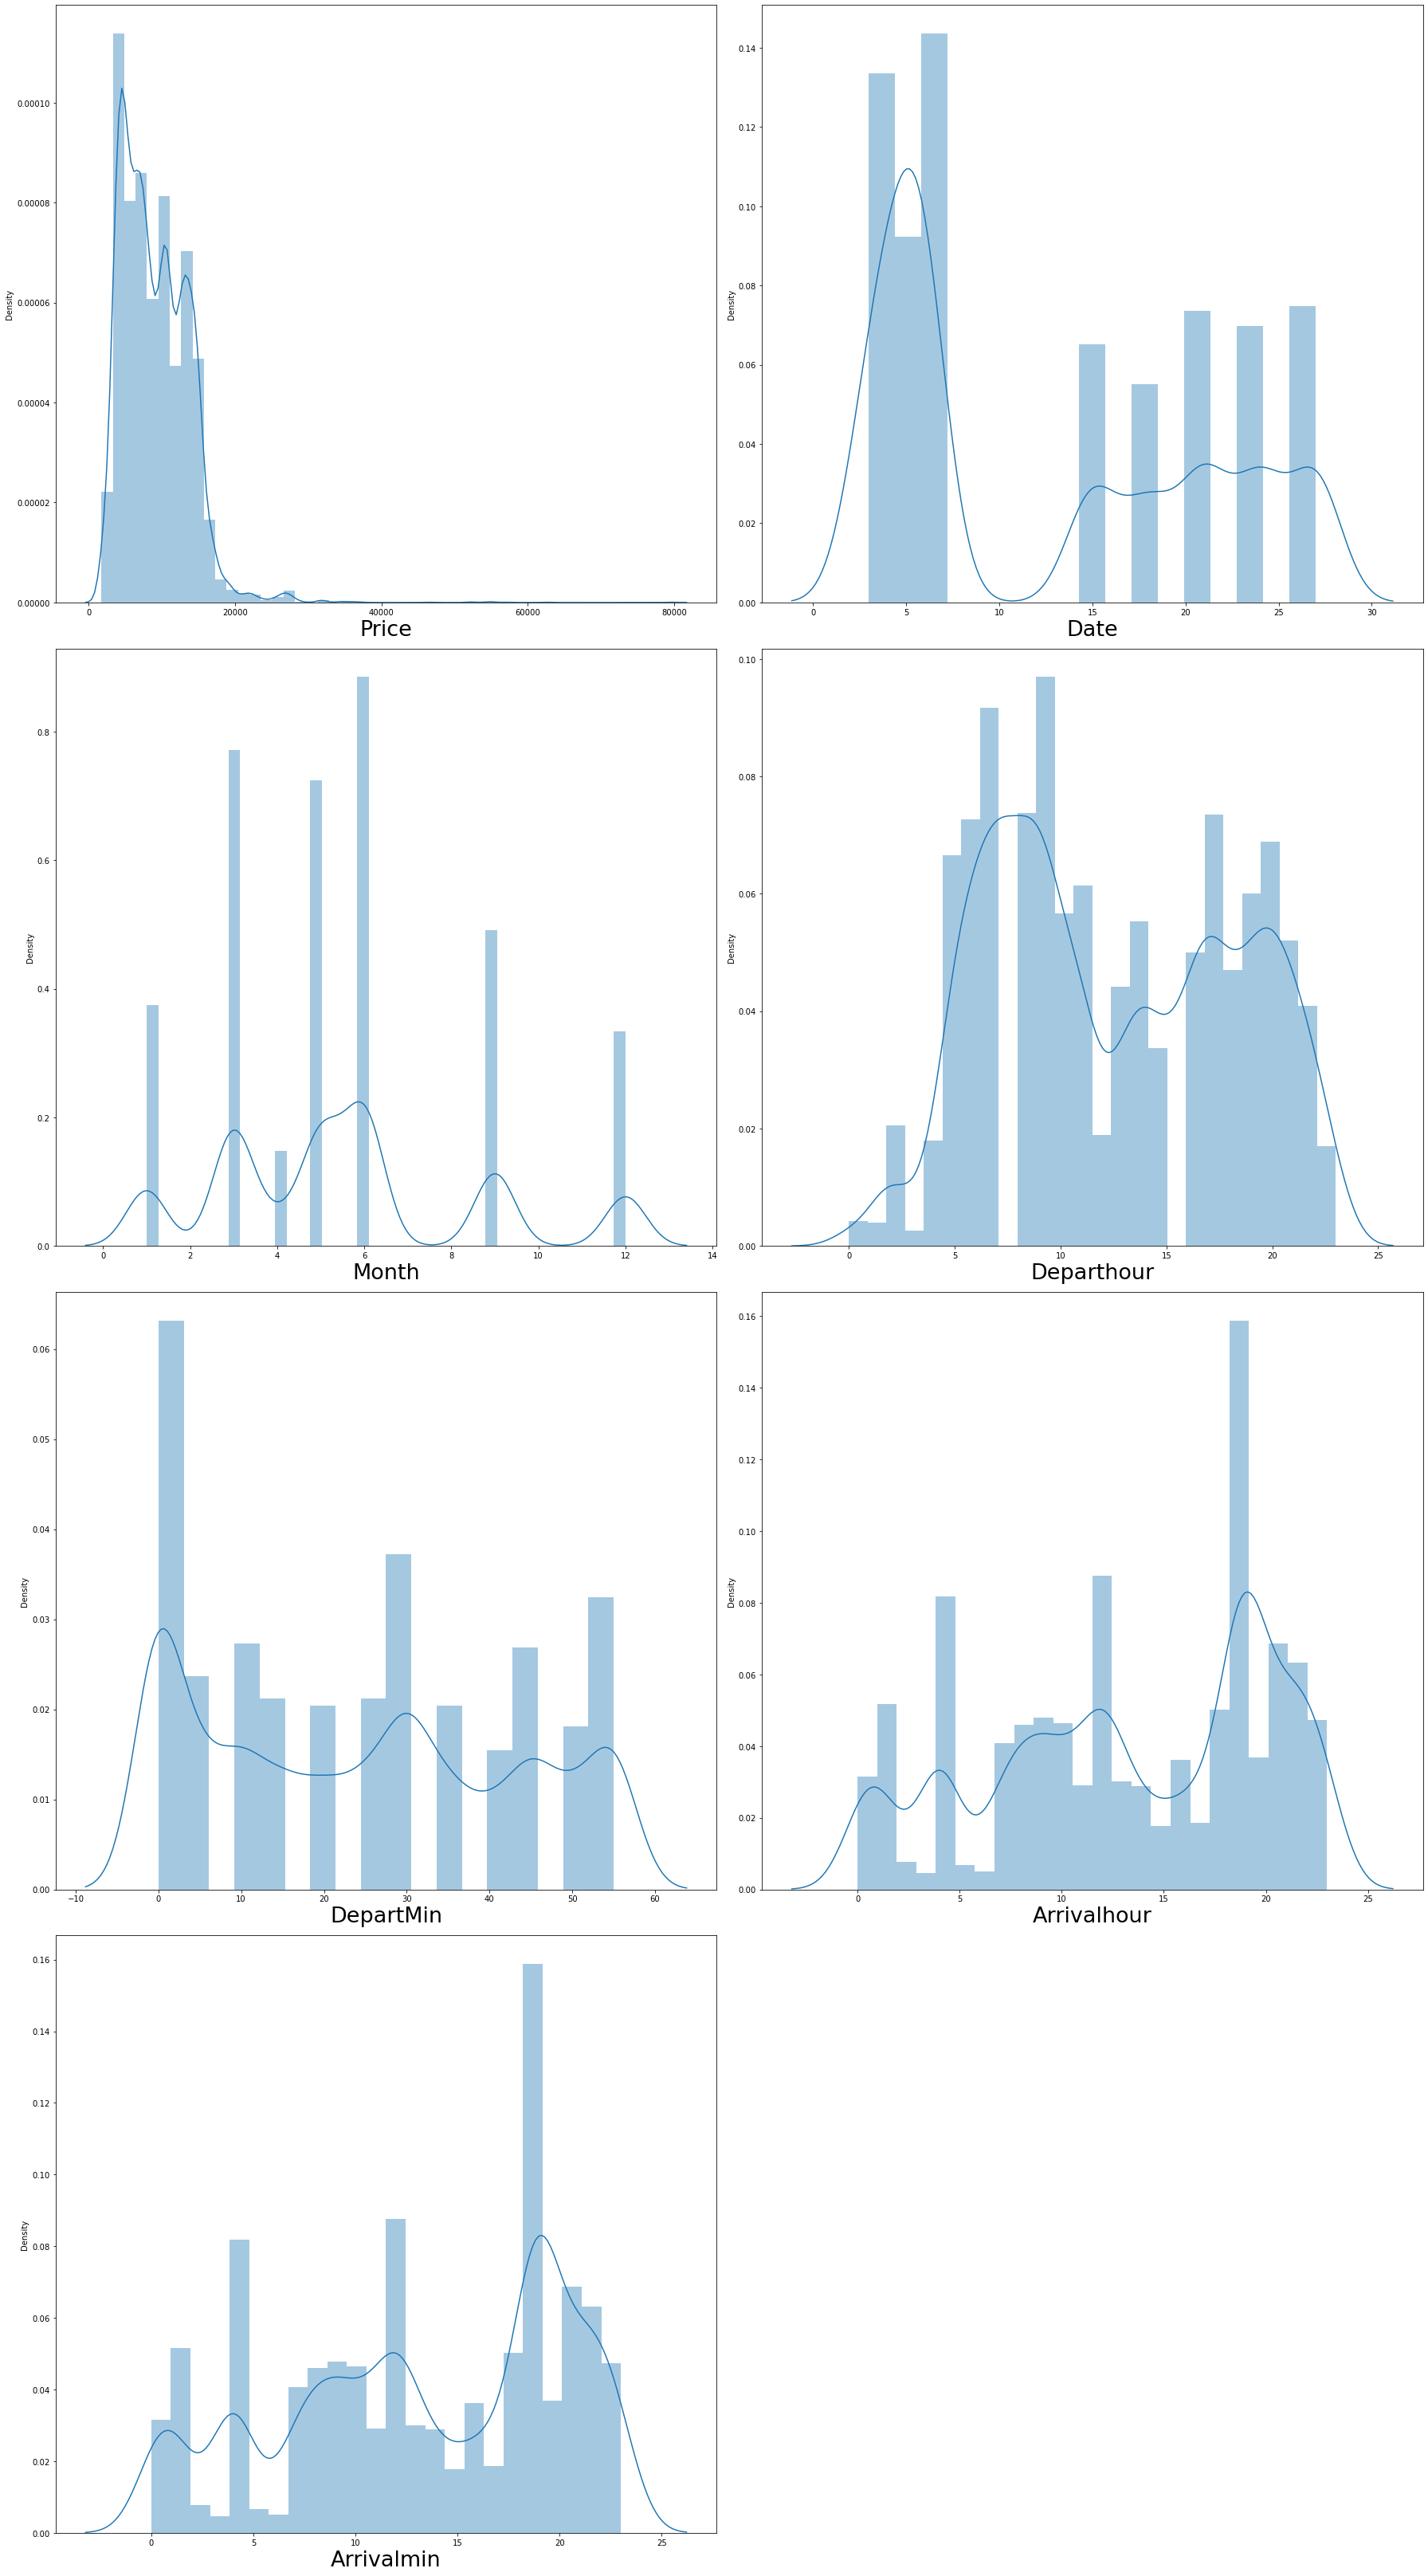

In [54]:
# For visualising all numerical columns using distribution plots:-
plt.figure(figsize=(25,45))
no=1
for i in df[integer]:
    if no <=7:
        ax=plt.subplot(4,2,no)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=27)
    no+=1
plt.tight_layout()

Here, As seen above, there is high skewness present in our Target column Price.
In column, Month and Date some amount of skewness is present.

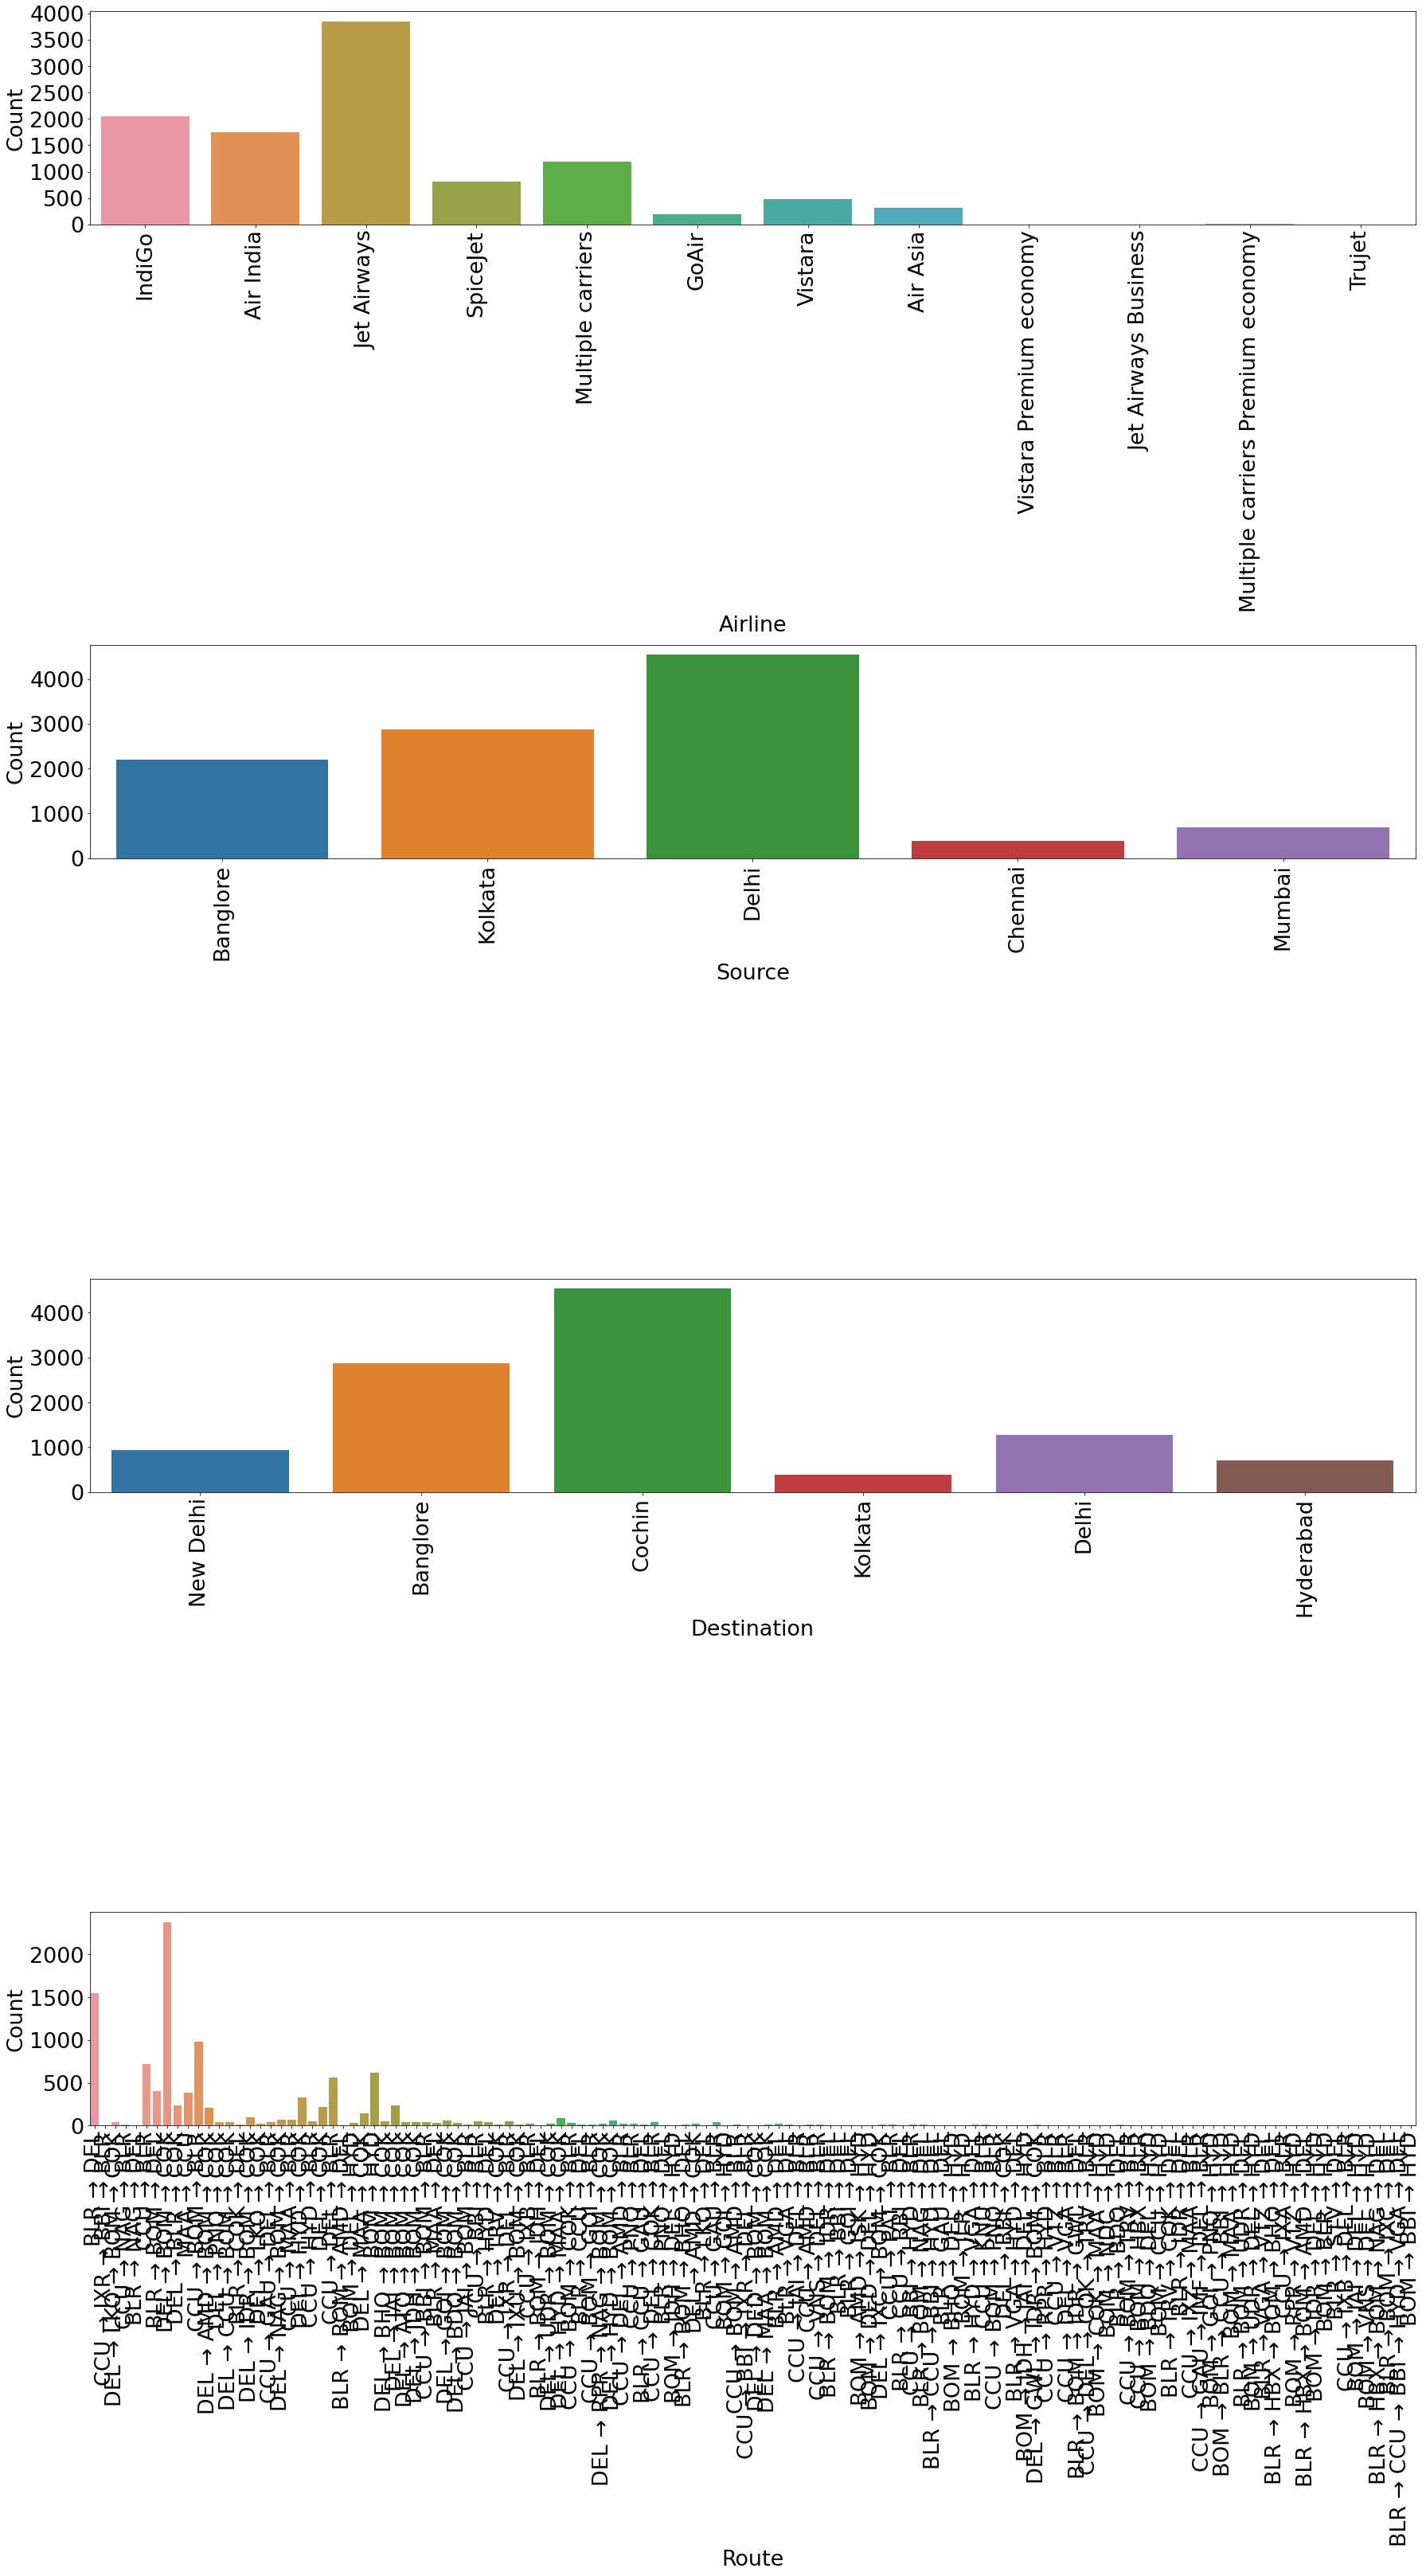

In [55]:
# For Visualizing all categorical columns using count plot:-
plt.figure(figsize=(25,45))
no=1
for i in df[categorical]:
    if no<=4:
        ax=plt.subplot(4,1,no)
        sns.countplot(df[i])
        plt.xticks(rotation=90, fontsize=27)
        plt.yticks(fontsize=27)
        plt.xlabel(i,fontsize=27)
        plt.ylabel("Count",fontsize=27)
    no+=1
plt.tight_layout()

# Bivariate Analysis:-

In [56]:
# For making list of integer column without our target column:-
integercol=['Date', 'Month', 'Departhour', 'DepartMin', 'Arrivalhour', 'Arrivalmin']

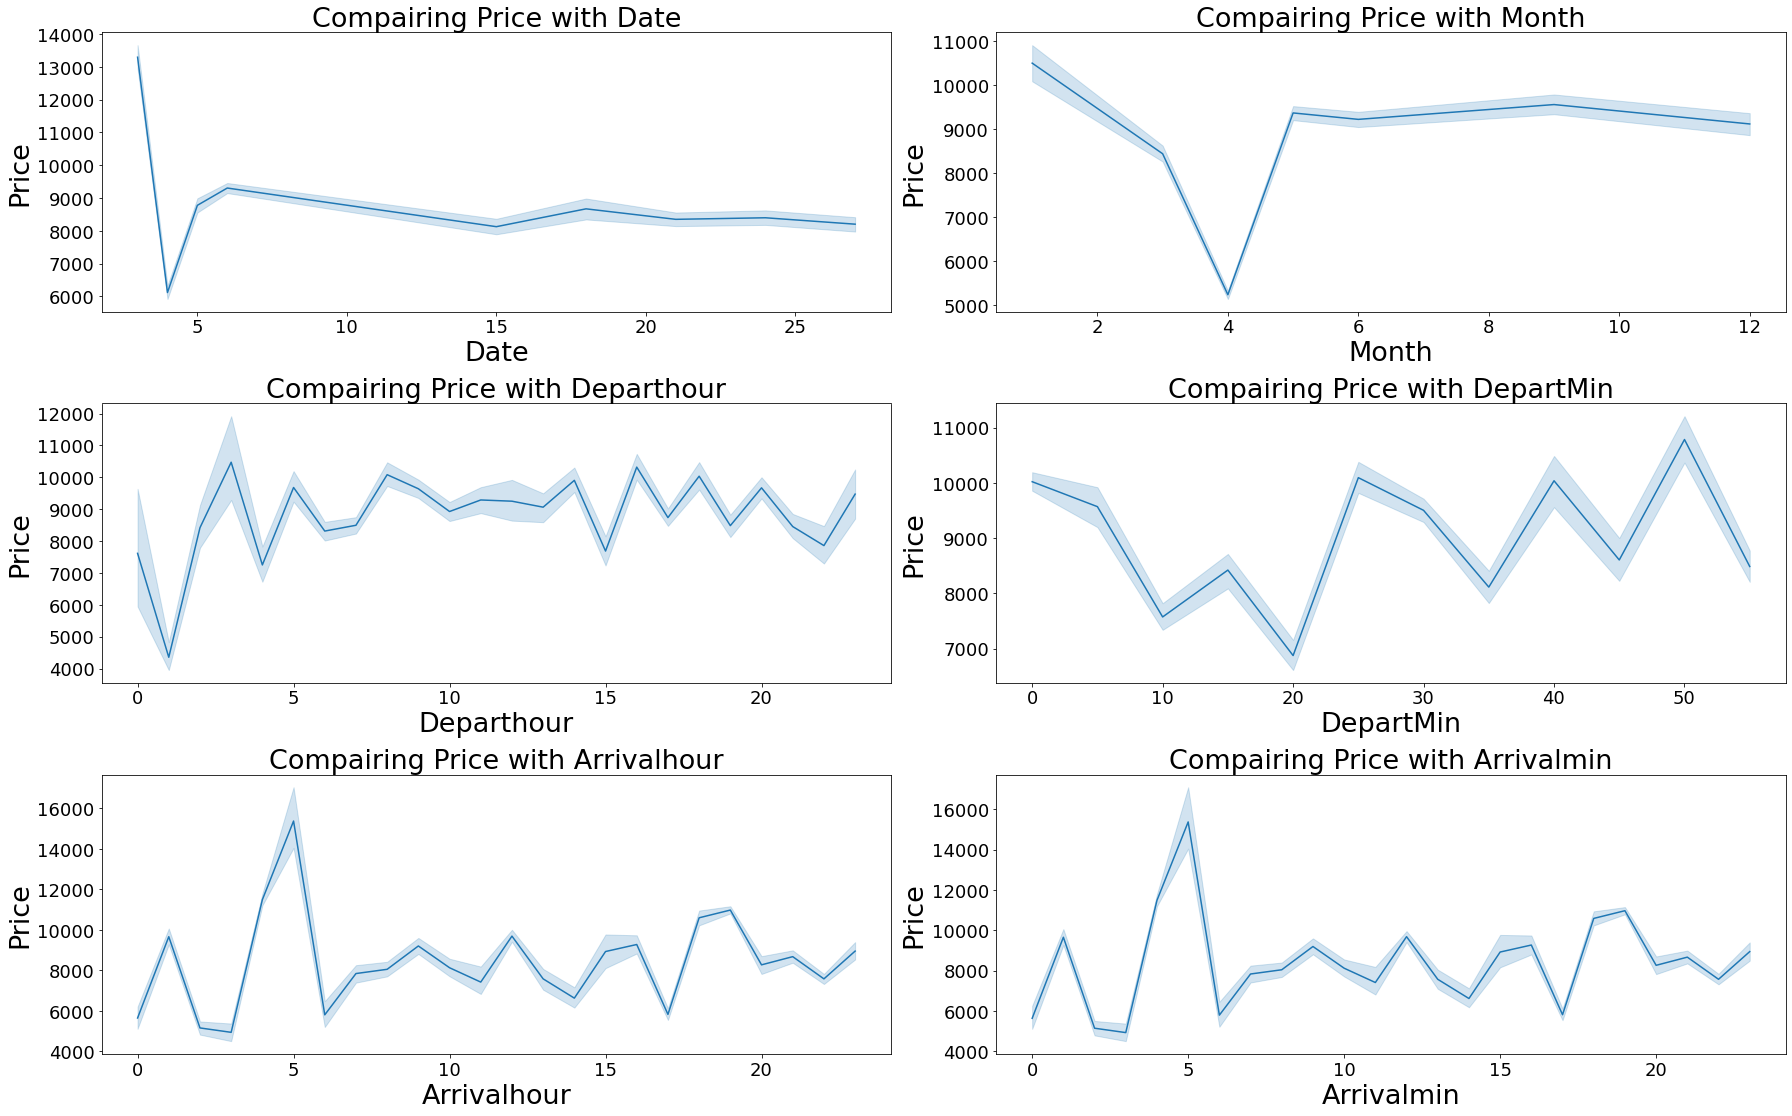

In [57]:
# For comparing Date with our target column Price:-
plt.figure(figsize=(25,20))
for i in range(len(integercol)):
    plt.subplot(4,2,i+1)
    sns.lineplot(x=df[integercol[i]], y=df['Price'])
    plt.title(f"Compairing Price with {integercol[i]}", fontsize=27)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(integercol[i],fontsize=27)
    plt.ylabel('Price', fontsize=27)
    plt.tight_layout()

Here, it is seen that there are chances of getting cheaper ticket for same destination if we plan well in advance. 
Closer the date of travelling comes, Higher the prices we have to pay for travelling.

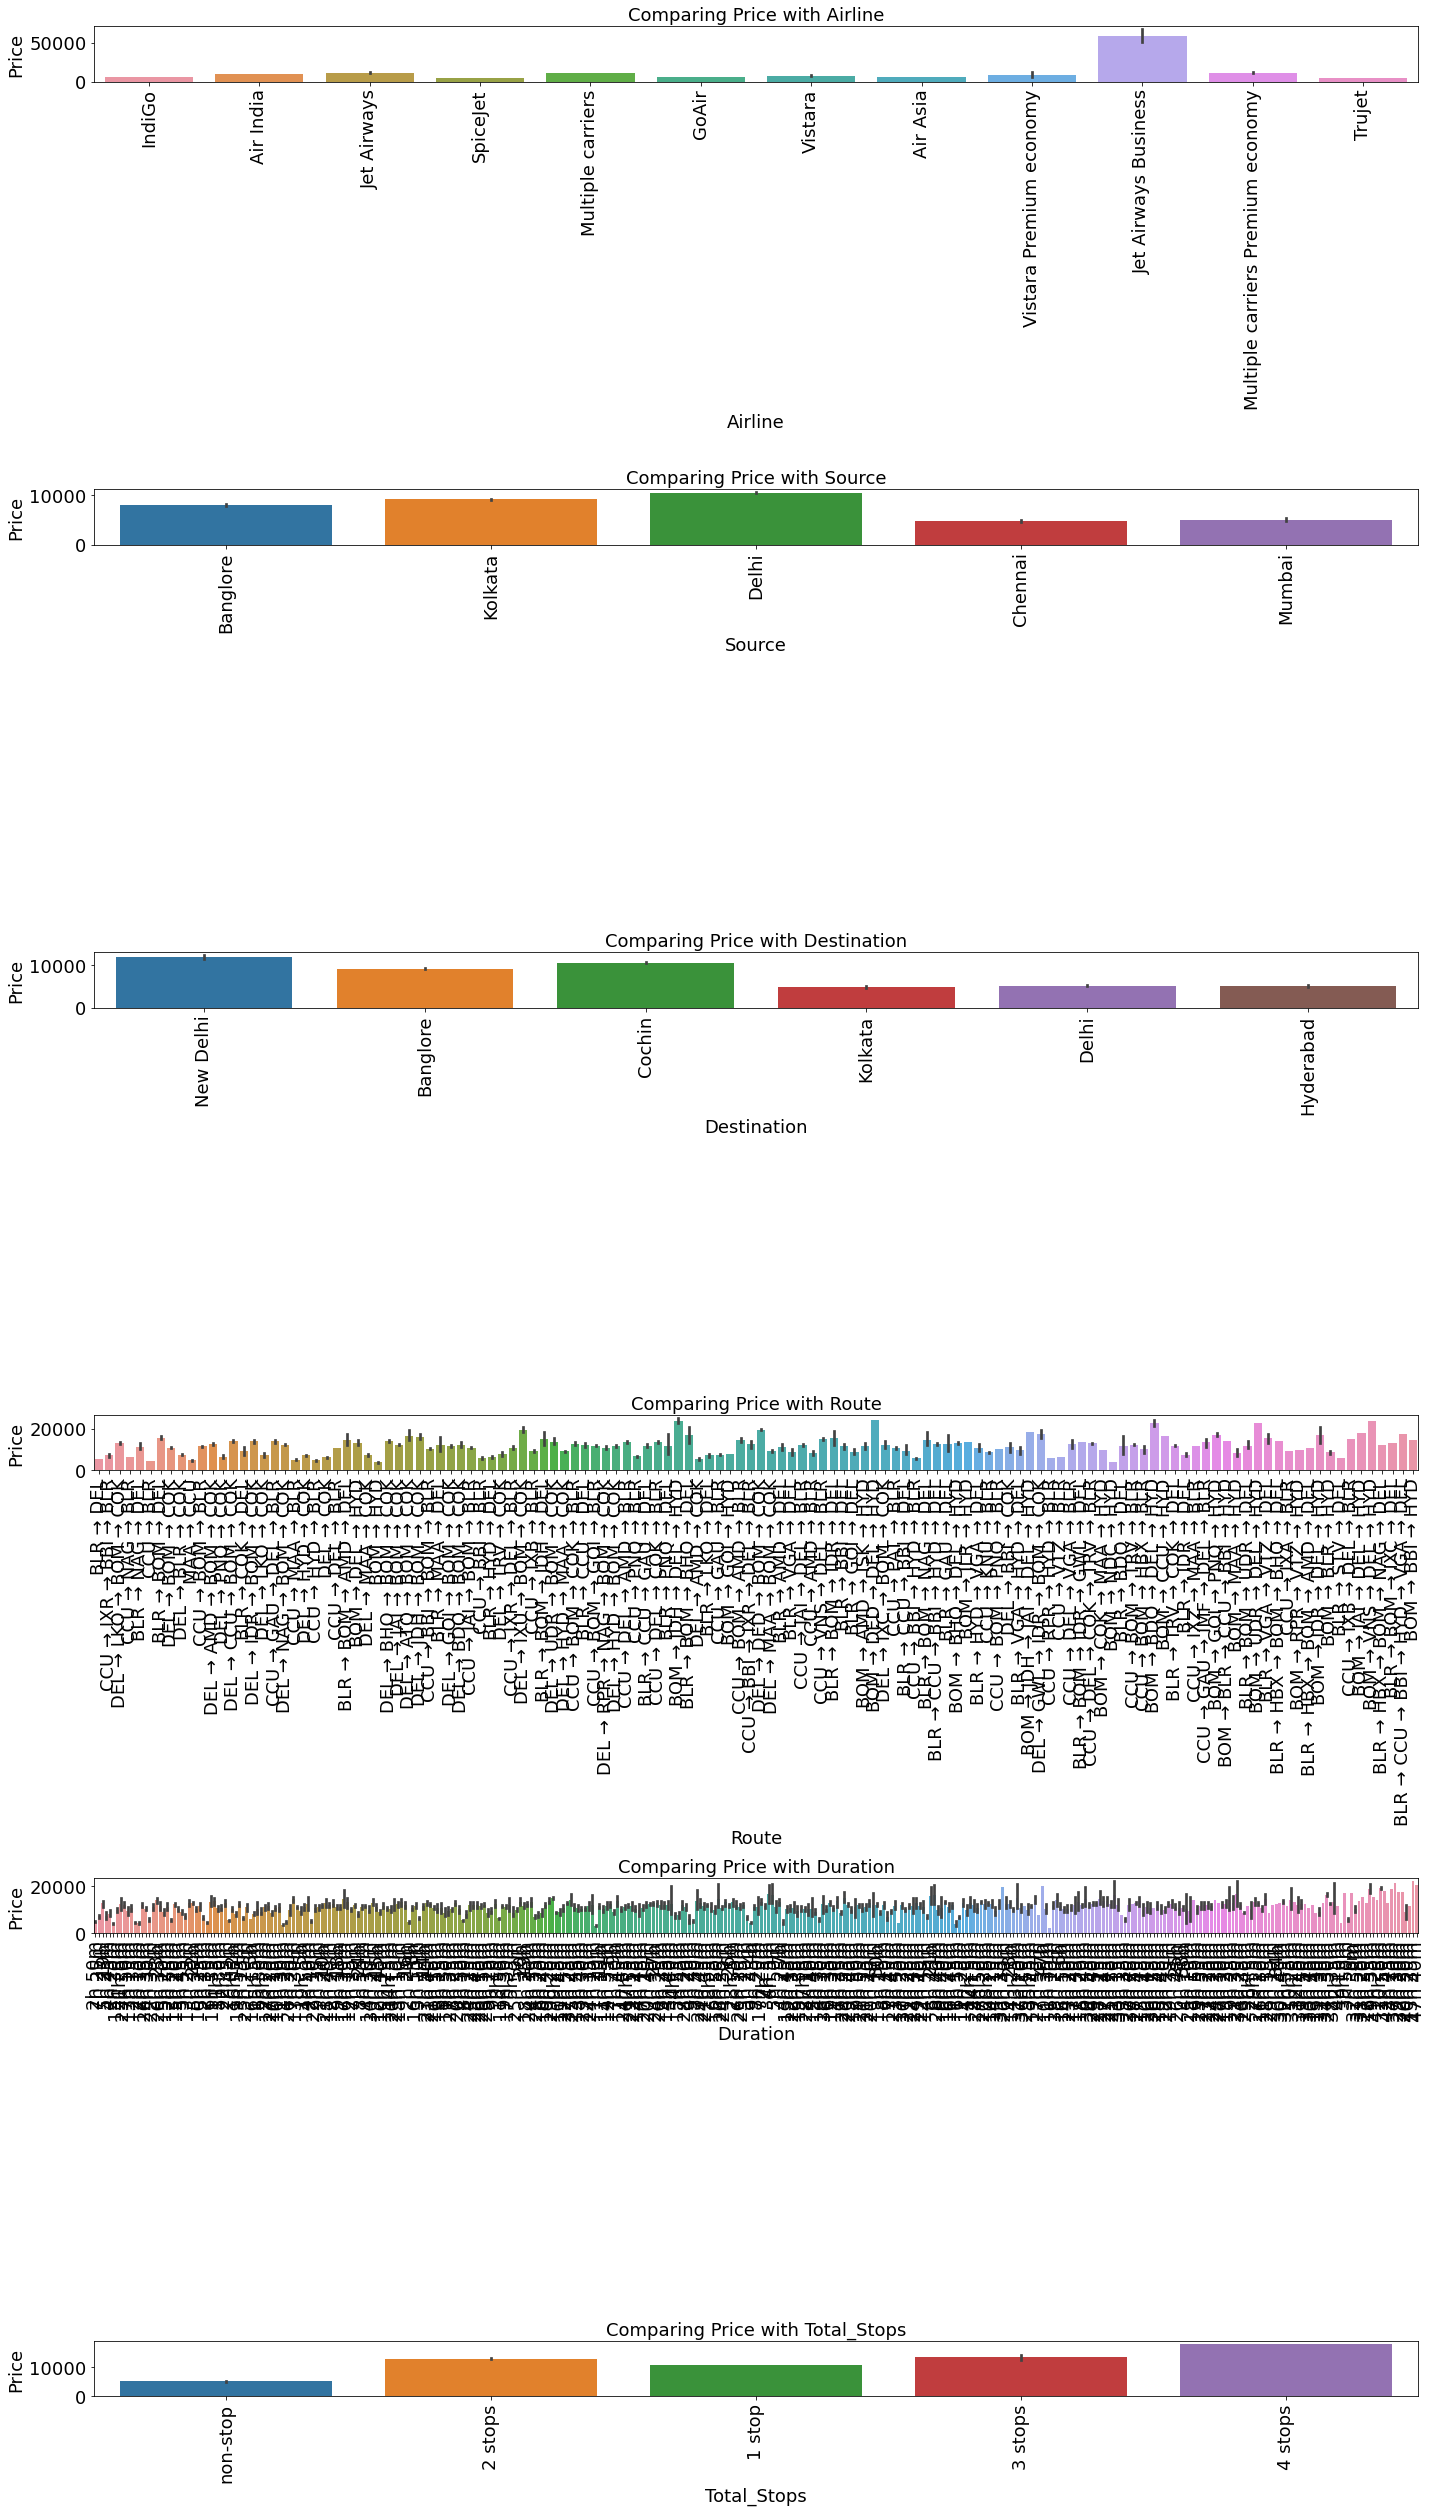

In [58]:
# For comparing all categorical columns with our target column:-
plt.figure(figsize=(20,35))
for i in range(len(categorical)):
    plt.subplot(6,1,i+1)
    sns.barplot(x=df[categorical[i]],y=df['Price'])
    plt.title(f"Comparing Price with {categorical[i]}",fontsize=18)
    plt.xticks(rotation=90,fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(categorical[i],fontsize=18)
    plt.ylabel('Price',fontsize=18)
    plt.tight_layout()

Here in first Bar plot, it is clearly seen that prices of tickets for direct non stop flights is cheaper as compared to one stop or more.

In second Bar plot, it is seen that prices of tickets for flights starting from Mumbai is cheaper compared to other cities, followed by Delhi, and Bengaluru.

# Multivariate Analysis:-

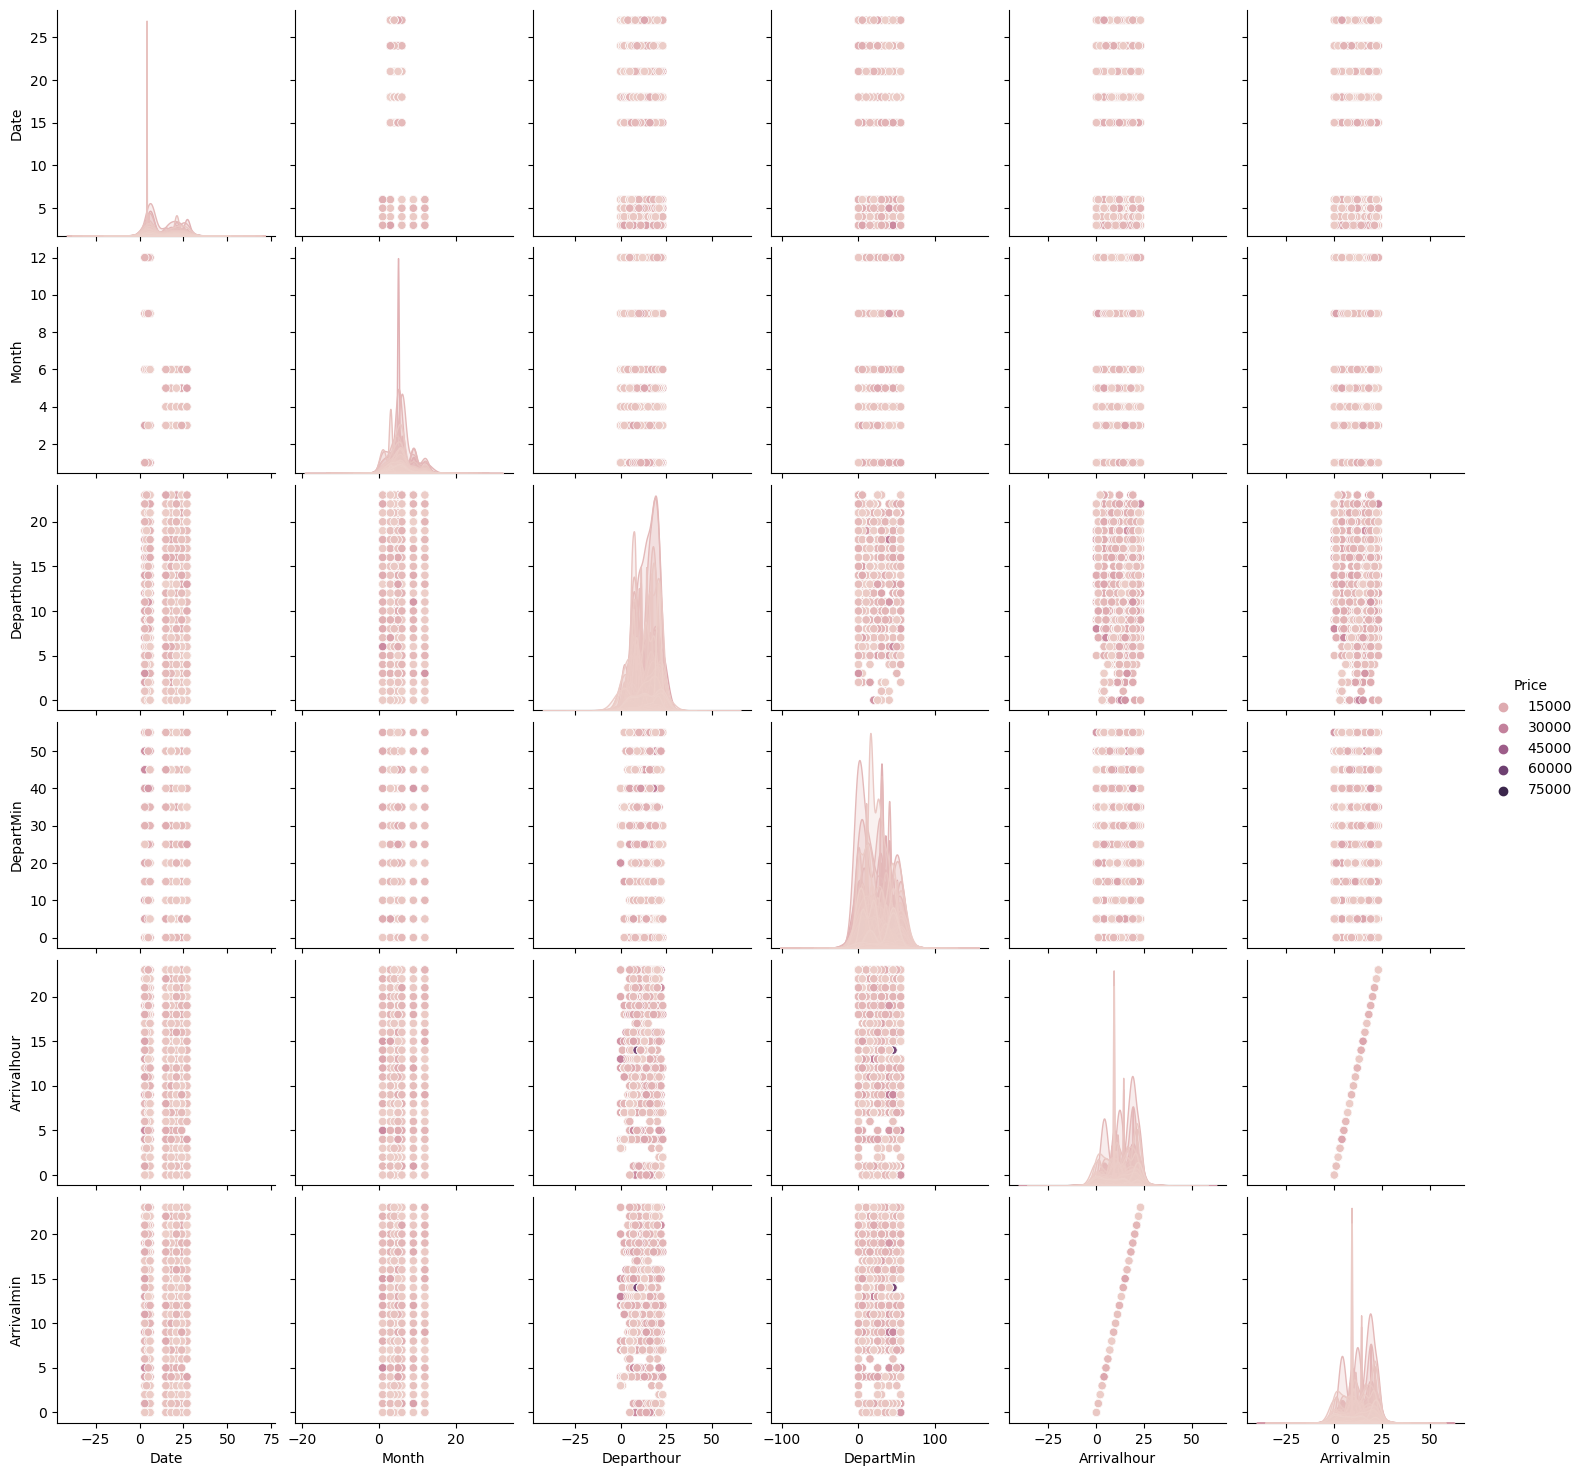

In [59]:
# For visualizing relationship among all the columns in the dataset:-
plt.style.use('default')
a=sns.pairplot(df,hue='Price',diag_kind='kde')
for ac in a.axes.flat:
    ax.tick_params('x',labelrotation=90)
plt.show()

In [60]:
# For checking correlation among dataset:-
corr=df.corr()

In [61]:
corr

,Price,Date,Month,Departhour,DepartMin,Arrivalhour,Arrivalmin
Price,1.000000,-0.165412,0.010700,0.006819,-0.024492,0.024264,0.024264
Date,-0.165412,1.000000,-0.264899,-0.002251,-0.016521,-0.002124,-0.002124
Month,0.010700,-0.264899,1.000000,0.028180,0.002152,-0.004338,-0.004338
Departhour,0.006819,-0.002251,0.028180,1.000000,-0.024806,0.005215,0.005215
DepartMin,-0.024492,-0.016521,0.002152,-0.024806,1.000000,0.043054,0.043054
Arrivalhour,0.024264,-0.002124,-0.004338,0.005215,0.043054,1.000000,1.000000
Arrivalmin,0.024264,-0.002124,-0.004338,0.005215,0.043054,1.000000,1.000000


<AxesSubplot:>

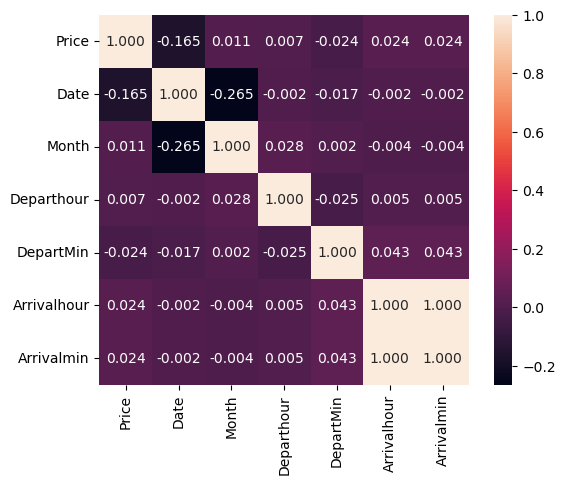

In [62]:
sns.heatmap(df.corr(),annot=True, square=True, fmt='0.3f')

<AxesSubplot:>

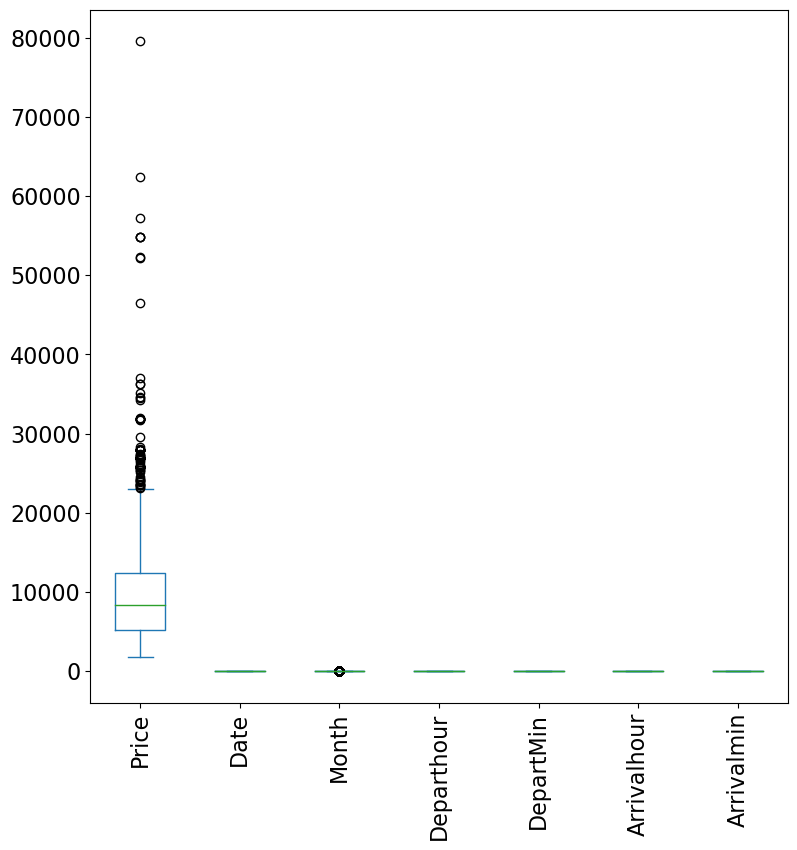

In [63]:
# For checking presence of outliers using boxplot:-
df.plot(rot=90,kind='box',fontsize=16,figsize=(9,9))

- Here as seen above, outliers are present only in Target column, so it will not be removed as it will affect model accuracy.

In [64]:
# For checking the skewness levels in dataset:-
df.skew()

Price          1.812552
Date           0.367373
Month          0.629540
Departhour     0.113073
DepartMin      0.167029
Arrivalhour   -0.369988
Arrivalmin    -0.369988
dtype: float64

In [65]:
# For removing skewness using yeo-johnson method:
feature=["Month"]

In [66]:
# For implimenting yeo-johnson method:-
from sklearn.preprocessing import PowerTransformer
test_scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod='box_cox' or 'yeo-johnson'\n"

In [68]:
df[feature]=test_scaler.fit_transform(df[feature].values)

In [69]:
# For checking the skewness once again:-
df.skew()

Price          1.812552
Date           0.367373
Month         -0.002380
Departhour     0.113073
DepartMin      0.167029
Arrivalhour   -0.369988
Arrivalmin    -0.369988
dtype: float64

# Encoding Techniques:-

In [70]:
# For importing neccessary libraries and converting dtype using labelEncoder:-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[categorical]=df[categorical].apply(le.fit_transform)
df[categorical].head()

,Airline,Source,Destination,Route,Duration,Total_Stops
0,3,0,5,18,240,4
1,1,3,0,84,336,1
2,4,2,1,118,106,1
3,3,3,0,91,311,0
4,3,0,5,29,303,0


# Model Building:-

In [71]:
# For assigning values to x and y for training and testing our dataset:-
x=df.drop('Price',axis=1)
y=df['Price']

In [72]:
# For importing required libraries for scaling data :-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Date,Month,Departhour,DepartMin,Arrivalhour,Arrivalmin
0,-0.410675,-1.658441,2.416665,-1.547138,0.422875,1.406839,1.285632,-0.821225,1.654259,-0.235050,-1.800427,-1.800427
1,-1.260999,0.890052,-0.973826,0.249797,1.306727,-0.253853,-0.872652,-1.873372,-1.303095,1.363492,-0.050851,-0.050851
2,0.014486,0.040555,-0.295728,1.175491,-0.810835,-0.253853,-0.759058,1.140722,-0.607247,0.031373,-1.363033,-1.363033
3,-0.410675,0.890052,-0.973826,0.440381,1.076557,-0.807417,-0.872652,1.859354,0.958411,-1.034321,1.407129,1.407129
4,-0.410675,-1.658441,2.416665,-1.247649,1.002903,-0.807417,-1.099840,-1.873372,0.610487,1.363492,1.115533,1.115533


Data has been scaled properly.

In [73]:
# For finding Best Random state and Accuracy and importing all required libraries for model selection:-
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [75]:
Max_acc=0
Max_rs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=i)
    Model=RandomForestRegressor()
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>Max_acc:
        Max_acc=acc
        Max_rs=i
print("Best Accuracy: ",Max_acc, "On Random_state: ",Max_rs)

Best Accuracy:  0.8429991598331465 On Random_state:  13


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=111 )

# Regression Model Building:-


In [77]:
# For importing all required libraries for model selection:-
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [78]:
ModelB=[LinearRegression(),KNN(),SVR(),RandomForestRegressor(),ExtraTreesRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]
for i in ModelB:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("Accuracy Score :",i,"is", i.score(x_train,y_train))
    print("\nError")
    print("Mean Absolute Error: ", mean_absolute_error(y_test,pred))
    print("Root mean Squared Error: ", (mean_squared_error(y_test,pred))**0.5)
    print("r2 Score: ",r2_score(y_test,pred))
    
    print("----------")
    print("\n\n")

Accuracy Score : LinearRegression() is 0.377196064393464

Error
Mean Absolute Error:  2712.4545998877074
Root mean Squared Error:  3792.760622425629
r2 Score:  0.3587720297948407
----------



Accuracy Score : KNeighborsRegressor() is 0.7812144602420537

Error
Mean Absolute Error:  1786.5375975039
Root mean Squared Error:  2815.6949384536847
r2 Score:  0.646594917132546
----------



Accuracy Score : SVR() is 0.021999170946814917

Error
Mean Absolute Error:  3563.9165561872474
Root mean Squared Error:  4699.728331913646
r2 Score:  0.01542886406802757
----------



Accuracy Score : RandomForestRegressor() is 0.9574875110953011

Error
Mean Absolute Error:  1209.9050387945647
Root mean Squared Error:  2184.228134024305
r2 Score:  0.7873342340093819
----------



Accuracy Score : ExtraTreesRegressor() is 0.9748201310932614

Error
Mean Absolute Error:  1259.6692131045243
Root mean Squared Error:  2304.5036679212863
r2 Score:  0.7632683099455229
----------



Accuracy Score : AdaBoostRegress

Here, ExtraTrees Is giving highest R2 score of 69.7 %.

# Cross Validation Phase:-


In [79]:
# For importing required libraries for cross validation:-
from sklearn.model_selection import cross_val_score
for j in ModelB:
    cvs=cross_val_score(j,x_train,y_train,cv=15).mean()
    print("Score of ",j, "is", cvs)

Score of  LinearRegression() is 0.3764293741846831
Score of  KNeighborsRegressor() is 0.6588019734178328
Score of  SVR() is 0.018013133349968537
Score of  RandomForestRegressor() is 0.8122291553119502
Score of  ExtraTreesRegressor() is 0.7925740280478675
Score of  AdaBoostRegressor() is 0.25599214661714303
Score of  GradientBoostingRegressor() is 0.790126522324282
Score of  Lasso() is 0.37648096548910887
Score of  Ridge() is 0.3764740008533541
Score of  ElasticNet() is 0.3309307600493693


So, Based on R2 score and cross validation score, ExtraTreesRegressor is giving least difference,So, ExtraTreesRegressor is  our best model and will hypertune it for best accuracy.

# Hyper Parameter Tuning:-

In [80]:
# For importing all required libraries:-
from sklearn.model_selection import GridSearchCV

In [ ]:
ExtraT=ExtraTreesRegressor()
parameter={'n_estimators':[10,50,100],'max_depth':[2,8,16],'criterion':['mse','mae'],'max_features':['auto','sqrt'],'random_state':[223]}
search=GridSearchCV(ExtraT,parameter)
search.fit(x_train,y_train)          

In [ ]:
print(search.best_params_)

In [ ]:
ExtraTR=ExtraTreesRegressor(n_estimators=100, max_depth=16, criterion='mae',max_features='auto',random_state=223)
ExtraTR.fit(x_train,y_train)
ExtraTR.score(x_train,y_train)
pred=ExtraTR.predict(x_test)
print("Accuracy Score: ",r2_score(y_test,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Root Mean Squared Error: ",(mean_squared_error(y_test,pred)**0.5))

# Saving the Model:-

In [ ]:
# For importing librariesfor saving model:- 
import pickle
Name="Flight_Price_Predictions.pkl"
pickle.dump(ExtraTR,open(Name,'wb'))

# Loading the Model:-

In [ ]:
# For loading model:-
Models=pickle.load(open(Name,'rb'))

In [ ]:
# For displaying predictions:-
prediction=Models.predict(x_test)
prediction

In [ ]:
pd.DataFrame([Models.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction)
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Here, the Actual and predicted values are shown above in scatter plot.

Thank You